# Homeworks 3 and 4: Clustering and Tree-based Classification [10 points]


### HIDS 506, Spring 2023

### Due: Thursday, April 27, 2022 11:59 pm E.T.

This homework will test your knowledge about Clustering using K-means and Classification  using Tree-based Classifiers. Fill in the code/answers for the questions as indicated below. 

Please edit this document directly using Jupyter or Google Colab and answer each of the questions in-line as indicated. 

Turn in a single document i.e. the Notebook showing all of your code and output for the entire assignment, with each question clearly demarcated. Submit your completed assignment through Canvas. The notebook can be downloaded by clicking the `File` option (top left) and clicking `Download .ipynb` in the drop down menu.

## 1. K-means Clustering  [5 points]

We will be using the Heart Disease dataset from the UCI Machine Learning Repository for this homework. This is the same dataset we used in Homework2


Specifically, we will be using one of the processed datasets from Cleveland, which has 14 attributes (most important ones used in other scientific works) from the total 76 features.

The dataset comprises 303 observations, 13 features, and 1 target attribute. The 13 features include the results of non-invasive diagnostic tests along with other relevant patient information. The target variable includes the result of the invasive coronary angiogram which represents the presence or absence of coronary artery disease in the patient with 0 representing the absence of CHD and labels 1-4 representing the presence of CHD. 

Full details of attributes can be found here: 

Link: https://archive.ics.uci.edu/ml/datasets/heart+disease

The file can be downloaded from Canvas: Files/Homeworks/Homework3_4/


You need to **cluster** the data points using the 13 features. **Note:** Since we are investigating clustering, which is an unsupervised algorithm, don't use the target column when applying the K-means clustering algorithm.

Please refer to the lecture 12 notebook, `12_kmeans_clustering_solved.ipynb` for hints.

**Steps:**

1. Read the dataset using Pandas. The outcome column in this dataset is `num`. Since we will be using unsupervised learning, we will not use this column. Create a feature matrix (X) with all the data points and the 13 features.

2. Perform any required data preprocessing of the features (X). This might include missing value imputation, normalization, and handling categorical columns.

3. Cluster the dataset into 2 clusters using the K-means algorithm. Note: You do not have to reduce the 13 dimensional feature space to 2 dimension using PCA as we did in lecture 12. We used PCA in lecture 12 for visualization and demo purposes. 

4. Report the sum of squared error (SSE) by the `inertia_` for the clustering obtained in Step 3. What does this indicate?

5. What should be the optimal number of clusters for this dataset? Hint: Check the target column `num`, which we are not using in K-means?

6. Use the "Elbow method" to determine the optimal number of clusters. Also, plot the elbow curve with SSE on the Y-axis and the number of clusters on the X-axis.

In [1]:
# Imports
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (10, 10)

from collections import Counter

from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score
from sklearn.metrics import roc_curve, precision_recall_curve, auc

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
matplotlib.rcParams['figure.figsize'] = (12, 10)

In [2]:
#helper functions
def get_predictions(predictions_proba, threshold=0.5):
  predictions = np.where(predictions_proba <= threshold, 0, 1)
  return predictions

#Function that calculates and print metrics
def show_metrics(testy, predictions):
  print('====================')
  accuracy = accuracy_score(testy, predictions)
  print('Accuracy: %.3f' % accuracy)
  recall = recall_score(testy, predictions)
  print('Recall: %.3f' % recall)
  precision = precision_score(testy, predictions)
  print('Precision: %.3f' % precision)
  f1 = f1_score(testy, predictions)
  print('F1: %.3f' % f1)
  print('====================')

#Function to plot ROC Curve
def plot_roc(testy, predictions, title):
    fpr, tpr, thresholds = roc_curve(testy, predictions)
    roc_auc = auc(fpr, tpr)  
    print('AUROC: %.3f' % roc_auc)
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], '--')
    plt.xlim([0.0, 1.05])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

#Function to plot PR Curve
def plot_prc(testy, predictions, title):
    precision, recall, thresholds = precision_recall_curve(testy, predictions)
    auc_score = auc(recall, precision)    
    plt.plot(recall,precision, label='PR curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0.5, 0.5], linestyle='--' )
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.xlim([0, 1.02])
    plt.ylim([0, 1.02])    
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

#Function to plot precision and recall vs all tresholds
def plot_prec_recall_vs_thresh(testy, predictions, title):
    precision, recall, thresholds = precision_recall_curve(testy, predictions)
    plt.plot(thresholds, precision[:-1], 'b--', label='precision')
    plt.plot(thresholds, recall[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')    
    plt.ylim([0,1])
    plt.legend(loc="lower right")
    plt.title(title)
    plt.show()

In [3]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


####Step 1

In [21]:
# read in data set
chd_file = '/content/drive/MyDrive/data-lecture7/chd_processed_cleveland.csv'
chd_df = pd.read_csv(chd_file)

In [22]:
chd_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [23]:
# establish feature matrix without outcome column 'num'
X_df = chd_df.drop(columns=['num'])
X_df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [24]:
X_df.shape

(303, 13)

####Step 2

In [26]:
X_df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
dtype: object

In [31]:
# observing value counts and variable in feature columns
X_df['thal'].value_counts()

3.0    166
7.0    117
6.0     18
?        2
Name: thal, dtype: int64

In [32]:
X_df['cp'].value_counts()

4.0    144
3.0     86
2.0     50
1.0     23
Name: cp, dtype: int64

In [33]:
# handling missing data
X_df.isna().sum()
# there are no missing values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

In [34]:
# notes for categorical features that need to be one-hot-encoded

# cp: chest pain type 
# Value 1: typical angina 
# Value 2: atypical angina 
# Value 3: non-anginal pain 
# Value 4: asymptomatic 

# restecg: resting electrocardiographic results 
# Value 0: normal 
# Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) 
# Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 

# slope: the slope of the peak exercise ST segment 
# Value 1: upsloping 
# Value 2: flat 
# Value 3: downsloping 

# thal: 3 = normal; 6 = fixed defect; 7 = reversable defect 

In [35]:
# recoding/replacing categorical varaibles for one-hot-encoding
#X_df['sex'].replace(0.0, 'female', inplace=True)
#X_df['sex'].replace(1.0, 'male', inplace=True)

#X_df['cp'].replace(1.0, 'typical angina', inplace=True)
#X_df['cp'].replace(2.0, 'atypical angina', inplace=True)
#X_df['cp'].replace(3.0, 'non-anginal pain', inplace=True)
#X_df['cp'].replace(4.0, 'asymptomatic', inplace=True)

#X_df['fbs'].replace(0.0, 'lower than 120mg/ml', inplace=True)
#X_df['fbs'].replace(1.0, 'greater than 120mg/ml', inplace=True)

#X_df['restecg'].replace(0.0, 'normal', inplace=True)
#X_df['restecg'].replace(1.0, 'ST-T wave abnormality', inplace=True)
#X_df['restecg'].replace(2.0, 'left ventricular hypertrophy', inplace=True)

#X_df['exang'].replace(0.0, 'no', inplace=True)
#X_df['exang'].replace(1.0, 'yes', inplace=True)

#X_df['slope'].replace(1.0, 'upsloping', inplace=True)
#X_df['slope'].replace(2.0, 'flat', inplace=True)
#X_df['slope'].replace(3.0, 'downsloping', inplace=True)

X_df['thal'].replace('?', 1.0, inplace=True)
X_df['ca'].replace('?', 4, inplace=True)

#X_df['thal'].replace('?', 'unknown', inplace=True)
#X_df['thal'].replace('3.0', 'normal', inplace=True)
#X_df['thal'].replace('6.0', 'fixed defect', inplace=True)
#X_df['thal'].replace('7.0', 'reversable defect', inplace=True)

#X_df['ca'].replace('?', 4, inplace=True)
#X_df['ca'].replace(0.0, 0, inplace=True)
#X_df['ca'].replace(1.0, 1, inplace=True)
#X_df['ca'].replace(2.0, 2, inplace=True)
#X_df['ca'].replace(3.0, 3, inplace=True)

In [58]:
# feature cleaning by casting as type int64
X_df['thal'] = X_df['thal'].astype('int64')
X_df['ca'] = X_df['ca'].astype('int64')

In [67]:
X_df.loc[0]['thal']

6

In [59]:
# Create dummy columns for categorical variables
#prefix_cols = ['thal', 'ca'] #'sex', 'cp', 'restecg', 'exang', 'slope', 
#dummy_cols = ['thal', 'ca']
#X_df = pd.get_dummies(X_df, prefix=prefix_cols, columns=dummy_cols)

In [60]:
X_df.head()
print(X_df.shape) # 13 features, 303 observations

(303, 13)


In [62]:
# cast X_df as int64 for scaling
X_df = X_df.astype('int64')

####Step 3

In [91]:
# scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_df)

In [92]:
# imports 
import tarfile
import urllib

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler


# PCA 

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


In [93]:
kmeans = KMeans(
    init="random",
    n_clusters=2,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [94]:
kmeans.fit(X_pca)

KMeans(init='random', n_clusters=2, n_init=10, random_state=42)

####Step 4

In [95]:
# The lowest SSE value
kmeans.inertia_

730.2279893004568

The SSE value is 730. This is the lowest sum of squared error or distance of predicted labels from the centroid. A SSE value of 730 means that the sum of squared distances of all the data points from their respective cluster centroids is 730. 

In [100]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[ 1.84240293, -0.13547575],
       [-1.1751543 ,  0.08641156]])

In [101]:
# The number of iterations required to converge
kmeans.n_iter_

11

In [102]:
# visualize labels 
kmeans.labels_[:5]

array([0, 0, 0, 1, 1], dtype=int32)

In [103]:
chd_df['num'][:5]

0    0
1    2
2    1
3    0
4    0
Name: num, dtype: int64

In [104]:
# predicting using kmeans
y_kmeans = kmeans.predict(X_pca)

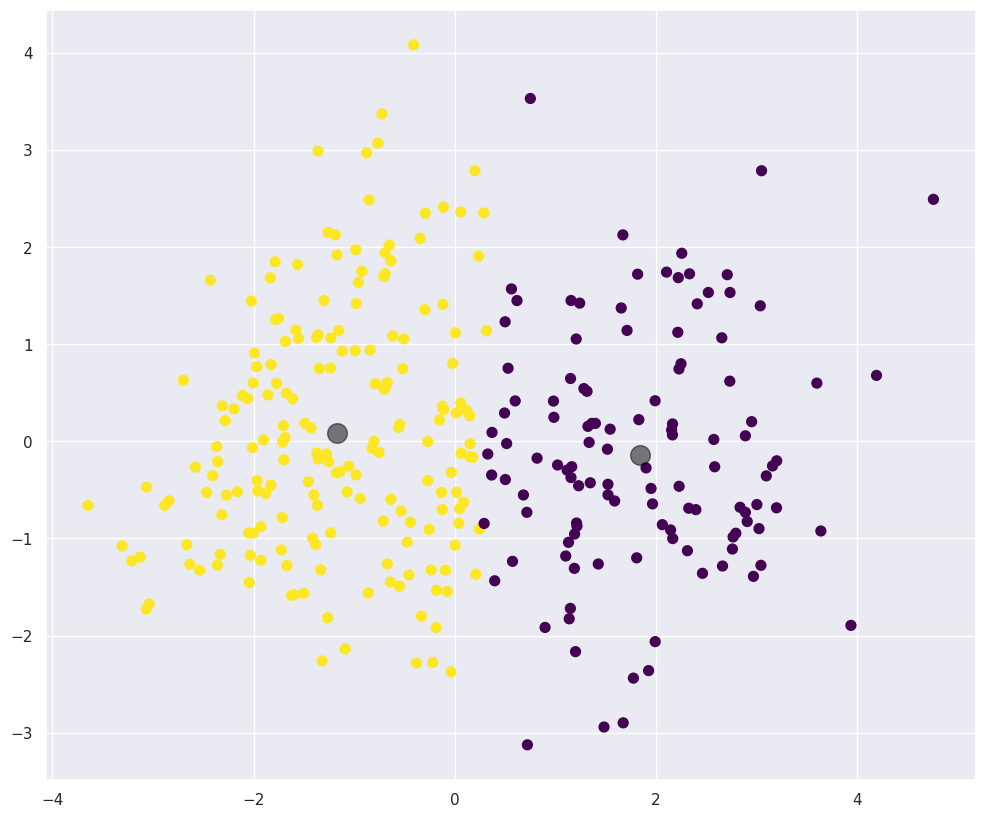

In [105]:
# plotting clusters 
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

####Step 5

In [106]:
chd_df['num'].value_counts()

0    164
1     55
2     36
3     35
4     13
Name: num, dtype: int64

In [108]:
num_of_clusters = 5

#intialize kmeans
kmeans = KMeans(
    init="random",
    n_clusters=num_of_clusters,
    n_init=10,
    max_iter=300,
    random_state=42
)

#fit kmeans
kmeans.fit(X_pca)

##cluster quality measure
# The lowest SSE value
kmeans.inertia_

301.63453711396215

In [109]:
num_of_clusters = 4

#intialize kmeans
kmeans = KMeans(
    init="random",
    n_clusters=num_of_clusters,
    n_init=10,
    max_iter=300,
    random_state=42
)

#fit kmeans
kmeans.fit(X_pca)

##cluster quality measure
# The lowest SSE value
kmeans.inertia_

374.26696882722615

The optimal number of clusters we would assume to be 5, which is how many labels the target column presents. The quality of cluster assignments is defined by the sum of squared error (SSE) using inertia_ (distance from the centroid). For 2 clusters, the inertia score was ~730 while the score for 5 clusters was 301. This indicated that 2 clusters has a higher variability than 5 clusters for this dataset and that having 5 clusters tunes the predicted data points to be closer to the centroid then having two as the SSE is lower for 5 clusters. However, the optimal number of clusters for a given dataset depends on several factors, such as the distribution of data, the complexity of the underlying patterns, and the purpose of the analysis.

####Step 6

In [110]:
# Elbow method
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

In [111]:
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X_pca)
    sse.append(kmeans.inertia_)

In [112]:
print(sse)

[1389.8027545193377, 730.2279893004568, 504.3952557298641, 374.26696882722615, 301.63453711396215, 258.8399204252179, 217.15310246404664, 187.5400571801037, 166.33107056554704, 148.01192895965238]


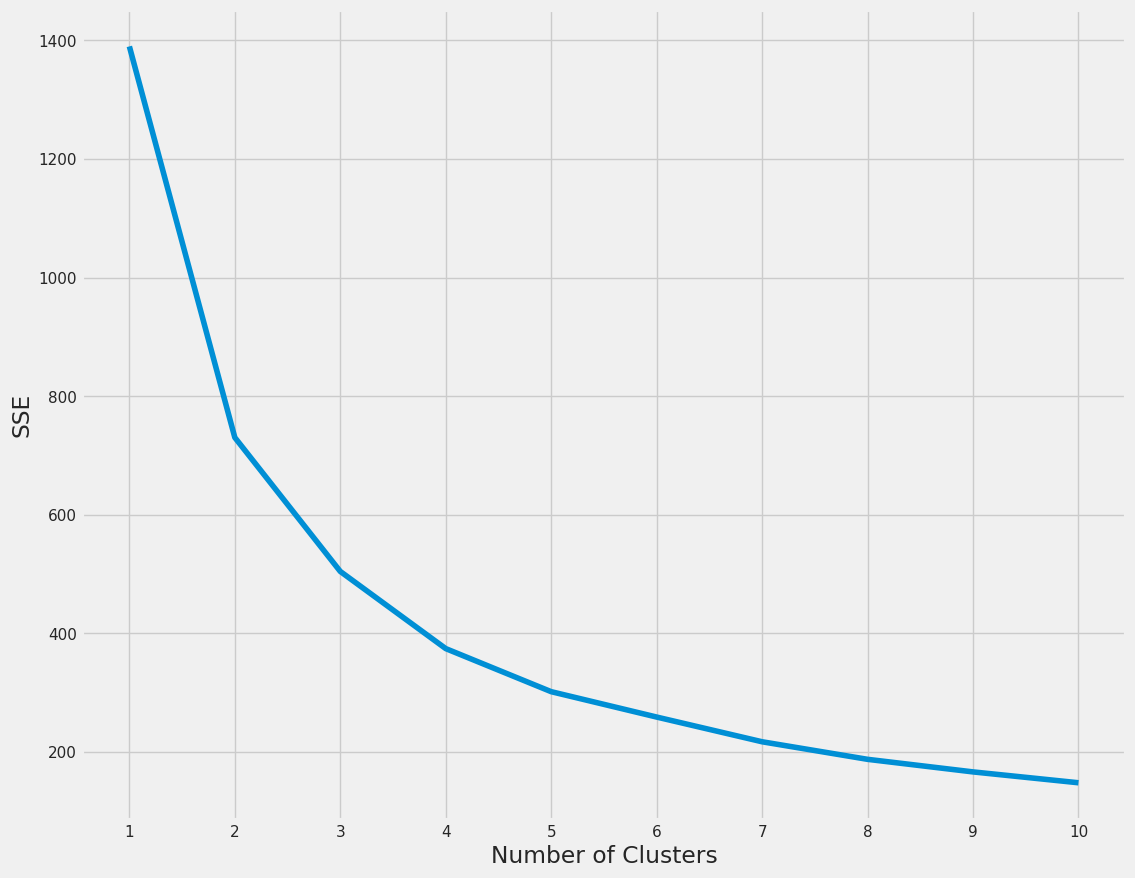

In [113]:
# plotting elbow 
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [116]:
num_of_clusters = 4

#intialize kmeans
kmeans = KMeans(
    init="random",
    n_clusters=num_of_clusters,
    n_init=10,
    max_iter=300,
    random_state=42
)

#fit kmeans
kmeans.fit(X_pca)

##cluster quality measure
# The lowest SSE value
kmeans.inertia_

374.26696882722615

In [117]:
#Insert you code below. Use as many cells as needed

## 2. Classification using Tree-Based Classifiers  [5 points]

We are going to use the same dataset as in Q1 to train and test tree-based classifiers for predicting the outcome column `num`,  which represents the presence or absence of coronary artery disease. Note: Since this is a supervised task, we will  use the target column in this question.

You may refer to the lecture 4 notebook, `sklearn_Decision_Tree_Demo.ipynb` for hints.

**Steps:**
1. Read the dataset using Pandas. The outcome column in this dataset is `num`, which has values 0, 1, 2, 3. We will transform this to a binary classification task. The column `num` represents the presence or absence of coronary artery disease in the patient with 0 representing the absence of CHD and labels 1-4 representing the presence of CHD. Create an outcome column (say "chd"), with a value of  1, indicating the presence of CHD and a value of 0, indicating the absence of CHD. Remove the column `num` as it is no longer needed.

2. Divide the dataset into feature matrix (X) and outcome arrays (y). Here the outcome  (y) is the newly created binary column that you create in 1.

3. Perform any required data preprocessing of the features (X). This might include missing value imputation, normalization, and handling categorical columns.

4. Split the dataset into training and test sets. Use a split of your choice (e.g. 80/20 or 70/30).

5. Fit a Decision Tree Classifier (DTC) on the training set and report the classification metrics (using classification report) on the test set. Rank the features in the dataset based on features importance returned the trained DTC model.

6. Repeat Step (5) using the Random Forest Classifier (RFC). Is there any difference in the feature importance ranking compared with DTC? If yes, which one (RFC or DTC) returns a better ranking according to you.


####Step 1

In [118]:
# visualizing the outcome (predicted attribute)
chd_df['num']
Counter(chd_df['num'])

# creating binary outcome (0, 1) from 'num' (0 indicating no presence of coronary artery disease, 1 indicating presence of coronary artery disease)
chd_df['chd'] = chd_df['num'].replace((1,2, 3, 4),(1, 1, 1 ,1)) 
chd_df = chd_df.drop(columns=['num'])
# verifying correct classification (multi-class to binary) by visualizing new 'binary_num' column against 'num'
chd_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,chd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


####Step 2

In [119]:
# splitting the feature matrix
y_chd_df = chd_df['chd']
X_chd_df = chd_df.drop(columns=["chd"])

In [120]:
y_chd_df.value_counts()

0    164
1    139
Name: chd, dtype: int64

####Step 3

In [121]:
# recoding/replacing categorical varaibles for one-hot-encoding
X_chd_df['sex'].replace(0.0, 'female', inplace=True)
X_chd_df['sex'].replace(1.0, 'male', inplace=True)

X_chd_df['cp'].replace(1.0, 'typical angina', inplace=True)
X_chd_df['cp'].replace(2.0, 'atypical angina', inplace=True)
X_chd_df['cp'].replace(3.0, 'non-anginal pain', inplace=True)
X_chd_df['cp'].replace(4.0, 'asymptomatic', inplace=True)

#X_chd_df['fbs'].replace(0.0, 'lower than 120mg/ml', inplace=True)
#X_chd_df['fbs'].replace(1.0, 'greater than 120mg/ml', inplace=True)

X_chd_df['restecg'].replace(0.0, 'normal', inplace=True)
X_chd_df['restecg'].replace(1.0, 'ST-T wave abnormality', inplace=True)
X_chd_df['restecg'].replace(2.0, 'left ventricular hypertrophy', inplace=True)

X_chd_df['exang'].replace(0.0, 'no', inplace=True)
X_chd_df['exang'].replace(1.0, 'yes', inplace=True)

X_chd_df['slope'].replace(1.0, 'upsloping', inplace=True)
X_chd_df['slope'].replace(2.0, 'flat', inplace=True)
X_chd_df['slope'].replace(3.0, 'downsloping', inplace=True)

X_chd_df['thal'].replace('?', 'unknown', inplace=True)
X_chd_df['thal'].replace('3.0', 'normal', inplace=True)
X_chd_df['thal'].replace('6.0', 'fixed defect', inplace=True)
X_chd_df['thal'].replace('7.0', 'reversable defect', inplace=True)

X_chd_df['ca'].replace('?', 4, inplace=True)
X_chd_df['ca'].replace(0.0, 0, inplace=True)
X_chd_df['ca'].replace(1.0, 1, inplace=True)
X_chd_df['ca'].replace(2.0, 2, inplace=True)
X_chd_df['ca'].replace(3.0, 3, inplace=True)

In [122]:
# Create dummy columns for categorical variables
prefix_cols = ['sex', 'cp', 'restecg', 'exang', 'slope', 'thal', 'ca']
dummy_cols = ['sex', 'cp', 'restecg', 'exang', 'slope', 'thal', 'ca']
X_chd_df = pd.get_dummies(X_chd_df, prefix=prefix_cols, columns=dummy_cols)

In [123]:
X_chd_df.head()

,age,trestbps,chol,fbs,thalach,oldpeak,sex_female,sex_male,cp_asymptomatic,cp_atypical angina,...,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect,thal_unknown,ca_4,ca_0.0,ca_1.0,ca_2.0,ca_3.0
0,63.0,145.0,233.0,1.0,150.0,2.3,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
1,67.0,160.0,286.0,0.0,108.0,1.5,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1
2,67.0,120.0,229.0,0.0,129.0,2.6,0,1,1,0,...,0,0,0,1,0,0,0,0,1,0
3,37.0,130.0,250.0,0.0,187.0,3.5,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
4,41.0,130.0,204.0,0.0,172.0,1.4,1,0,0,1,...,1,0,1,0,0,0,1,0,0,0


In [124]:
X_chd_df.shape

(303, 29)

####Step 4

In [125]:
# splitting into train and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X_chd_df, y_chd_df, test_size=0.2, random_state=2)

In [126]:
# shape of train and test feature sets
X_train.shape, X_test.shape

((242, 29), (61, 29))

In [127]:
# shape of train and test outcome sets
y_train.shape, y_test.shape

((242,), (61,))

In [128]:
# number of positive and negative observations in the train and test outcome sets
Counter(y_train), Counter(y_test)

(Counter({1: 115, 0: 127}), Counter({0: 37, 1: 24}))

In [129]:
# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 242 samples.
Testing set has 61 samples.


####Step 5

In [130]:
# Decision Tree Classifier 
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy',max_depth=3)
tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [131]:
from pydotplus.graphviz import graph_from_dot_data
from sklearn.tree import export_graphviz

# Create dot data

dot_data = export_graphviz(                           
    tree, filled=True, rounded=True,
    class_names=['CHD', 'Not Detected'],
    feature_names=X_train.columns,
    out_file=None
)

 # Create graph from dot data
 
graph = graph_from_dot_data(dot_data)                
graph.write_png('tree_chd.png')  

from sklearn.metrics import accuracy_score
y_pred = tree.predict(X_test)
accuracy_score(y_test,y_pred)

0.7868852459016393

####Step 6

In [132]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)


RandomForestClassifier()

In [133]:
# predict on fitted model
y_pred = model.predict(X_test)
# accuracy of model
accuracy_score(y_test,y_pred)

0.8524590163934426

In [134]:
# Get feature importances from the Random Forest Classifier
importances = model.feature_importances_

# Print feature importances
for i, importance in enumerate(importances):
    print(f"Feature {i}: {importance}")


Feature 0: 0.06970018069819871
Feature 1: 0.060029127302248034
Feature 2: 0.06582774851223691
Feature 3: 0.009069477424084968
Feature 4: 0.08080029272051226
Feature 5: 0.09117251031872713
Feature 6: 0.02817997577988016
Feature 7: 0.01389293658920696
Feature 8: 0.09264240220800454
Feature 9: 0.007464422183764039
Feature 10: 0.024638691030792834
Feature 11: 0.011287061779853218
Feature 12: 0.0003994498921907484
Feature 13: 0.011605402977005973
Feature 14: 0.011516330060764053
Feature 15: 0.041161218733928924
Feature 16: 0.0370162918401665
Feature 17: 0.005554294614712931
Feature 18: 0.023863290256951584
Feature 19: 0.026066766354160952
Feature 20: 0.004740190297452702
Feature 21: 0.09060366672296602
Feature 22: 0.07587170476435239
Feature 23: 0.0003693304345264718
Feature 24: 0.0020415903639489233
Feature 25: 0.07608033675304873
Feature 26: 0.018499193061379645
Feature 27: 0.011138527535884133
Feature 28: 0.008767588789049268


In [135]:
# feature importance ranking using Random Forest trained model
feature_importance_df = pd.DataFrame({"feature": list(X_train.columns), 
                                      "importance": model.feature_importances_}
                                     ).sort_values("importance", ascending=False)
feature_importance_df

,feature,importance
8,cp_asymptomatic,0.092642
5,oldpeak,0.091173
21,thal_normal,0.090604
4,thalach,0.080800
25,ca_0.0,0.076080
22,thal_reversable defect,0.075872
0,age,0.069700
2,chol,0.065828
1,trestbps,0.060029
15,exang_no,0.041161


The decision tree performed with 78% accuracy while Random Forest feature importance model performed with 85% accuracy. Each decision tree model for feature importance had similar results, however, Random Forest showed more accuracy of predictions for feature importance. In my opinion, Random Forest performed better when ranking feature importance because it is an ensemble of Decision Trees that averages out the effects of individual trees and reduces the variance of the feature importance estimates rather than a single Decision Tree. 





In [ ]:
#Insert you code below. Use as many cells as needed